In [1]:
# Import modules needed for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential, layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Import Dataset three datasets, adding headers, combined into one dataframe
imdb_dataset = \
    pd.read_csv( \
    '/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /datasets/imdb_labelled.txt', \
    sep='\t', header=None, names = ['sentences','score'], \
    dtype = {'sentences':str, 'score':np.int32}, quoting=csv.QUOTE_NONE, \
    index_col = False)

yelp_dataset = \
    pd.read_csv( \
    '/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /datasets/yelp_labelled.txt', \
    sep='\t', header=None, names = ['sentences','score'], \
    dtype = {'sentences':str, 'score':np.int32}, quoting=csv.QUOTE_NONE, \
    index_col = False)

amazon_dataset = \
    pd.read_csv( \
    '/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /datasets/amazon_cells_labelled.txt', \
    sep='\t', header=None, names = ['sentences','score'], \
    dtype = {'sentences':str, 'score':np.int32}, quoting=csv.QUOTE_NONE, \
    index_col = False)        

combined_dataset = pd.concat([amazon_dataset,yelp_dataset,imdb_dataset], ignore_index = True)

In [3]:
#View Dataset and statistics
print(combined_dataset.head(10),
      '\n\n',combined_dataset.shape,
      '\n\n',combined_dataset.describe())

                                           sentences  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1
5  I have to jiggle the plug to get it to line up...      0
6  If you have several dozen or several hundred c...      0
7        If you are Razr owner...you must have this!      1
8                Needless to say, I wasted my money.      0
9                   What a waste of money and time!.      0 

 (3000, 2) 

              score
count  3000.000000
mean      0.500000
std       0.500083
min       0.000000
25%       0.000000
50%       0.500000
75%       1.000000
max       1.000000


<AxesSubplot:xlabel='score', ylabel='count'>

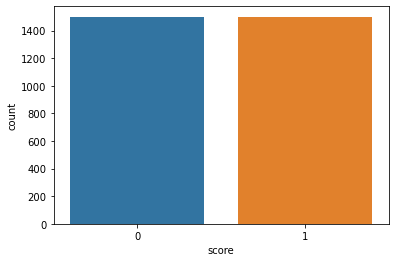

In [4]:
#View distribution of Scores
sns.countplot(data=combined_dataset, x='score')

In [5]:
#Remove nulls
combined_dataset.dropna()

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I just got bored watching Jessice Lange take h...,0
2996,"Unfortunately, any virtue in this film's produ...",0
2997,"In a word, it is embarrassing.",0
2998,Exceptionally bad!,0


In [6]:
#Remove any non-string values
for x in range(0,len(combined_dataset)-1):
    if type(combined_dataset.iloc[x] ['sentences']) != str:
        combined_dataset.iloc[x] ['sentences'] = str(combined_dataset.iloc[x] ['sentences'])

In [7]:
#Test - Train - Validation Set Creation

# X = Comments / Y = pos_neg_ind OR score
comments = combined_dataset['sentences']        
pos_neg_ind = combined_dataset['score']
        
        # Get max length of the comments
max_comment_length = max(comments.str.len())

print(f'\nThe maximum Comment length is: {max_comment_length}')


The maximum Comment length is: 479


In [8]:
#Train Test Data
comment_train, comment_test, score_train, score_test = train_test_split(
                                                            comments, 
                                                            pos_neg_ind, 
                                                            test_size = 0.25, 
                                                            random_state=42)
#Validation Set
comment_train, comment_validation, score_train, score_validation = train_test_split(
                                                                        comment_train, 
                                                                        score_train, 
                                                                        random_state = 42, 
                                                                        test_size = .25, 
                                                                        stratify=score_train)

In [9]:
#Tokenize and Remove Special Characters
tokenizer = Tokenizer(filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split = ' ', oov_token='<OOV>')
tokenizer.fit_on_texts(comment_train)
index_of_words = tokenizer.word_index
vocabulary_size = len(index_of_words)+1


# Indentify Vocabulary Size
print(f'\nAmazon/Yelp/IMDB Vocabulary Size: {vocabulary_size}')  

# Word Embedding Length
embedding_length = int(round(np.sqrt(np.sqrt(len(index_of_words)+1)),0))
print(f'\nWord Embedding Length: {embedding_length}')


Amazon/Yelp/IMDB Vocabulary Size: 3749

Word Embedding Length: 8


In [10]:
# Length of sentences
sentence_length = []
for length in comment_train:
    sentence_length.append(len(length.split(' ')))

print(f'\nThe longest sentence length is: {np.max(sentence_length)} ')
print(f'The shortest sentence length is: {np.min(sentence_length)}')
print(f'The median sentence length is {np.median(sentence_length)}')


The longest sentence length is: 73 
The shortest sentence length is: 1
The median sentence length is 11.0


In [11]:
# Sequence Train / Test / Validation data
comment_train_seq_padded = pad_sequences(tokenizer.texts_to_sequences(comment_train), padding = 'post', maxlen = np.max(sentence_length))
comment_test_seq_padded = pad_sequences(tokenizer.texts_to_sequences(comment_test), padding = 'post', maxlen = np.max(sentence_length))
comment_validate_seq_padded = pad_sequences(tokenizer.texts_to_sequences(comment_validation), padding = 'post', maxlen = np.max(sentence_length))

#Print data for splits
print(f'\ncomment_train: {comment_train.shape[0]}\ncomment_test: {comment_test.shape[0]}\ncomment_validation: {comment_validation.shape[0]}')

# Print Sequence example
print('\n',comment_train_seq_padded[1])


comment_train: 1687
comment_test: 750
comment_validation: 563

 [   2  914  915    2   75 1501  168   73  142    3  684    7 1502    2
   75  470    3  685    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [12]:
# Export Data Sets
pd.DataFrame(comment_train).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /comment_train_data.csv')
pd.DataFrame(comment_test).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /comment_test_data.csv')
pd.DataFrame(score_train).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /score_train_data.csv')
pd.DataFrame(score_test).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /score_test_data.csv')
pd.DataFrame(comment_validation).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /comment_validation_data.csv')
pd.DataFrame(score_validation).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /score_validation_data.csv')
pd.DataFrame(comment_train_seq_padded).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /comment_padded_train_data.csv')
pd.DataFrame(comment_test_seq_padded).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /comment_padded_test_data.csv')
pd.DataFrame(comment_validate_seq_padded).to_csv('/Users/bixbypeterson/Desktop/WGU/D213/Task 2 - Sentiment Analysis /comment_padded_validate_data.csv')

In [13]:
# Sentiment Analysis 
       
activation = 'sigmoid'   
loss = 'binary_crossentropy'
optimizer = 'adam'
early_stop_mon = EarlyStopping(patience = 2)

In [14]:
# Instaniate a Sequential
model = Sequential([layers.Embedding(vocabulary_size, embedding_length),
                    layers.GlobalAveragePooling1D(),
                    layers.Dense (100, activation = 'relu'),
                    layers.Dense(50, activation = 'relu'),
                    layers.Dense(1, activation = activation)
                    ])

2022-08-23 10:43:47.670855: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Compile the model
model.compile(loss = loss, optimizer = optimizer, metrics = ['accuracy'])

In [16]:
# Get Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           29992     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 35,993
Trainable params: 35,993
Non-trainable params: 0
____________________________________________________

In [17]:
# Fit the model
history = model.fit(comment_train_seq_padded, score_train, batch_size = 32, epochs = 20, validation_split=0.3, callbacks=[early_stop_mon], verbose=True)

Epoch 1/20
37/37 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4949 - val_loss: 0.6928 - val_accuracy: 0.5108
Epoch 2/20
37/37 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5203 - val_loss: 0.6926 - val_accuracy: 0.5108
Epoch 3/20
37/37 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5076 - val_loss: 0.6915 - val_accuracy: 0.5108
Epoch 4/20
37/37 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5661 - val_loss: 0.6857 - val_accuracy: 0.6706
Epoch 5/20
37/37 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.6610 - val_loss: 0.6594 - val_accuracy: 0.5858
Epoch 6/20
37/37 [==============================] - 0s 5ms/step - loss: 0.5882 - accuracy: 0.8008 - val_loss: 0.5913 - val_accuracy: 0.7613
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.4615 - accuracy: 0.8500 - val_loss: 0.5518 - val_accuracy: 0.7101
Epoch 8/20
37/37 [==

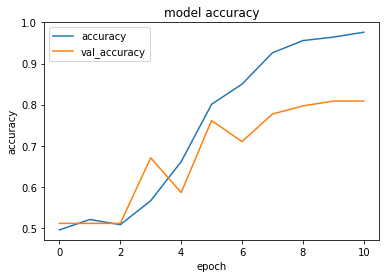

In [18]:
# Visualize Model Performance
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [19]:
# Evaluate Model on Test data
model_evaluate_test = model.evaluate(comment_test_seq_padded, score_test, verbose = 0)
print(f'\nTest Loss: {model_evaluate_test[0]} / Test Accuracy: {model_evaluate_test[1]}')

# Evaulate model on Validation data
model_evaluate_validation = model.evaluate(comment_validate_seq_padded, score_validation, verbose = 0)
print(f'\nValidation Loss: {model_evaluate_validation[0]} / Validation Accuracy: {model_evaluate_validation[1]}')


Test Loss: 0.4367081820964813 / Test Accuracy: 0.8040000200271606

Validation Loss: 0.46567535400390625 / Validation Accuracy: 0.80817049741745
